Meet AdventureTel, a thriving telecommunications company known for its top-notch services. Lately, they've noticed a gradual decline in their customer base, and it's raising concerns in the boardroom. The company prides itself on excellent customer service, competitive pricing, and a range of cutting-edge services like high-speed internet and personalized TV packages.

However, in the dynamic and competitive telecom industry, retaining customers is becoming increasingly challenging. The executives at AdventureTel want to get ahead of the curve and proactively address customer churn. Losing customers not only impacts revenue but also the company's reputation.

To tackle this issue, AdventureTel has gathered extensive data on customer behavior, usage patterns, service interactions, and satisfaction scores. They've decided to leverage this data to build a customer churn prediction model. The goal is to identify customers who are at a high risk of churning before it actually happens.

The data includes features like customer tenure, monthly spending, types of services subscribed, customer feedback, and historical service interruptions. AdventureTel believes that by predicting potential churners, they can implement targeted retention strategies. For instance, offering personalized discounts, providing proactive customer support, or introducing loyalty programs.

The success of AdventureTel depends on the accuracy of their churn prediction model. They're looking not only to retain customers but also to enhance overall customer experience. AdventureTel knows that predicting customer churn isn't just about saving revenue; it's about building lasting relationships with their valued customers.

Now, the challenge is to build a robust predictive model that can sift through the data and provide actionable insights. The company has reached out to data scientists and analysts to help them on this adventure of retaining customer loyalty and ensuring the future success of AdventureTel.

## Introductory part

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import pickle
from flask import Flask, request, render_template
from keras import layers
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Customer Churn/customer_churn.csv'

In [4]:
df = pd.read_csv(path)

# Relationships

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
df.shape

(7043, 21)

In [7]:
#Check datatypes of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#  Missing Values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
(11/7043)*100

0.1561834445548772

0.16% of the TotalCharges is missing. This is quite insignificant so dropping the rows with empty cells will have no impact on our ML model.

In [11]:
df.dropna(inplace= True, axis = 0)

In [12]:
#customerID doesn't have much value
df.drop('customerID', axis =1, inplace=True)

In [13]:
df.shape

(7043, 20)

In [14]:
#check for empty values
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
total_missing=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum().sort_values(ascending=False)/df.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

,total_missing,percentage_missing


In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Preprocessing

In [17]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [18]:
df.replace('No phone service','No', inplace=True)
df.replace('No internet service','No', inplace=True)

In [19]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Distributions

In [21]:
#Convert Total Charges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [22]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Count of Total Charges')

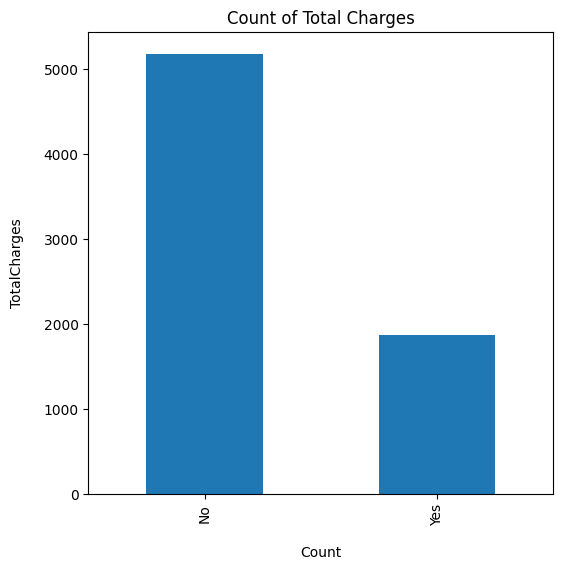

In [23]:
df['Churn'].value_counts().plot(kind = 'bar', figsize=(6,6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('TotalCharges', labelpad=14)
plt.title('Count of Total Charges')

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
# for column in df.columns:
#    print(df[column].nunique)

# Univariate analysis

In [26]:
print(df['tenure'].max())

72


In [27]:
labels = ["{0}-{1}".format(i, i+11) for i in range (1, 72, 12)]
df['tenure_group']=pd.cut(df.tenure, range(1,80,12), right=False, labels=labels)

In [28]:
df['tenure_group'].value_counts().sort_index()

1-12     2175
13-24    1024
25-36     832
37-48     762
49-60     832
61-72    1407
Name: tenure_group, dtype: int64

In [29]:
df.drop(['tenure'], axis=1, inplace=True)

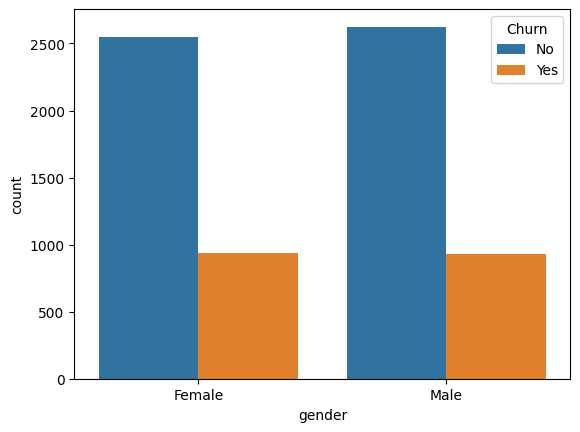

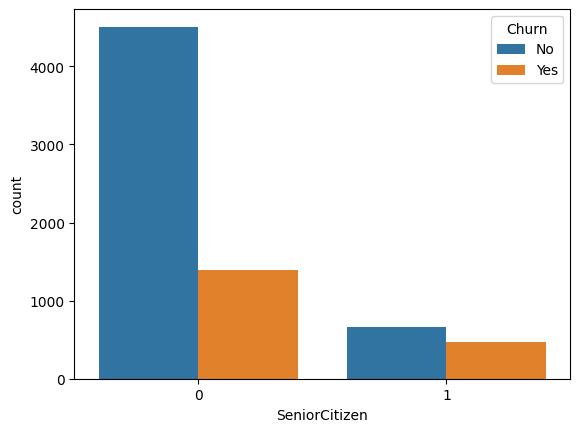

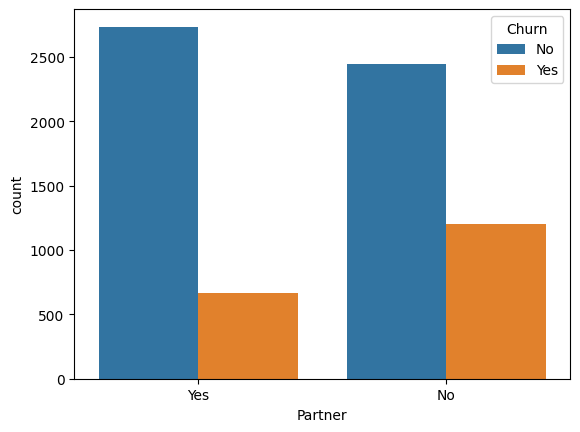

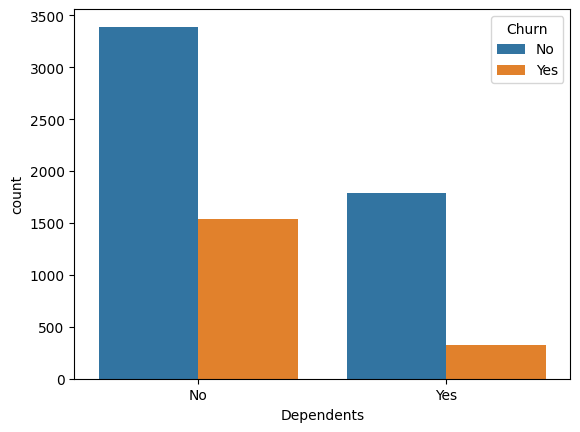

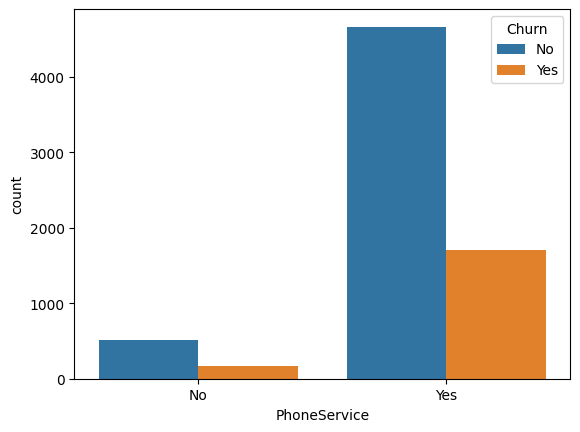

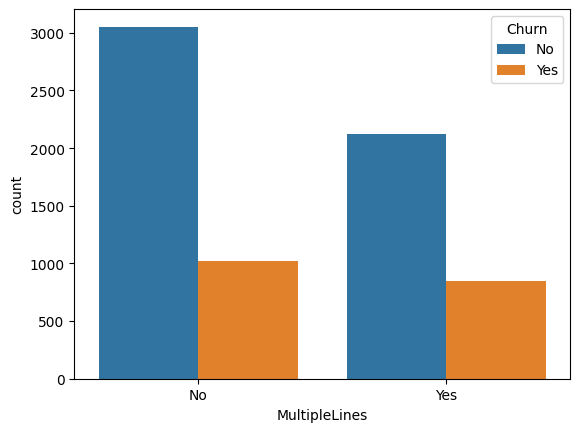

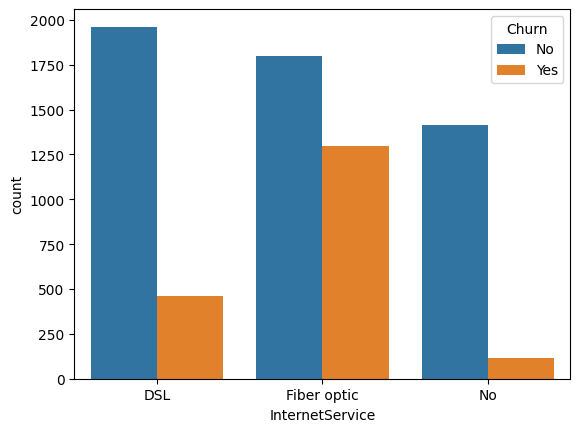

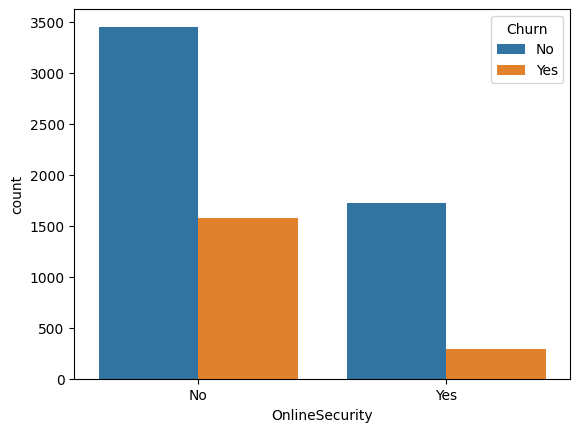

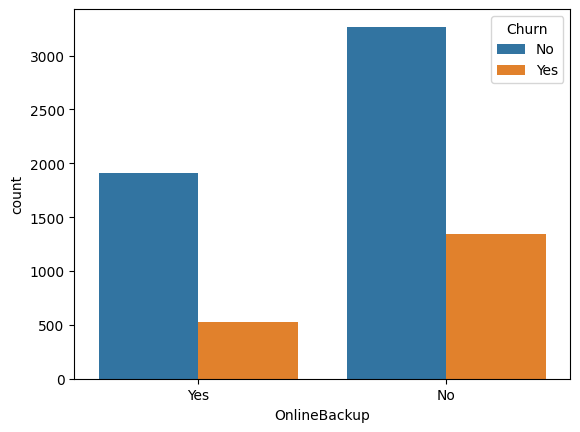

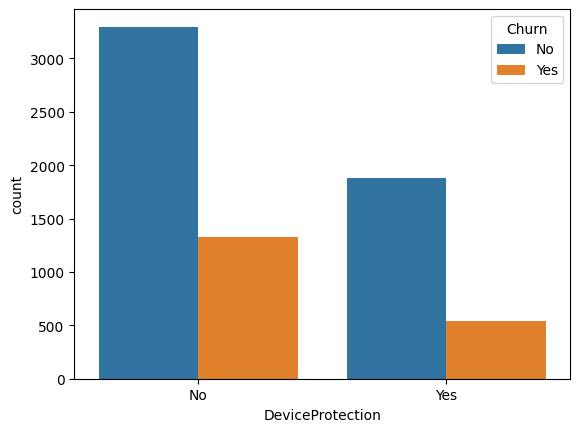

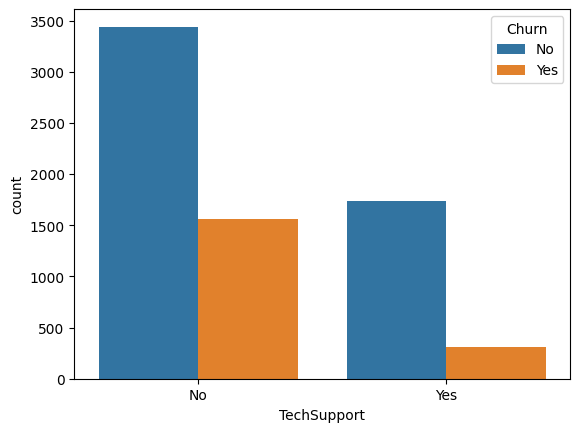

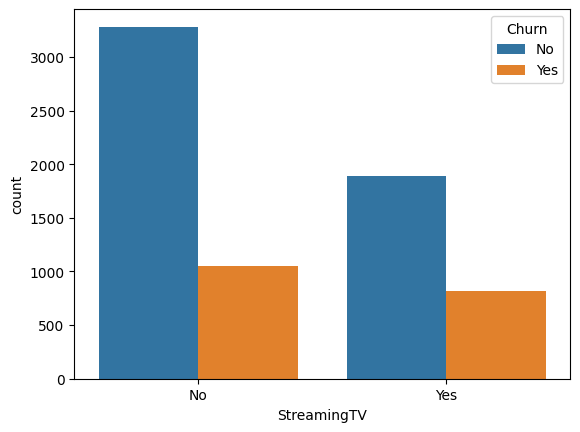

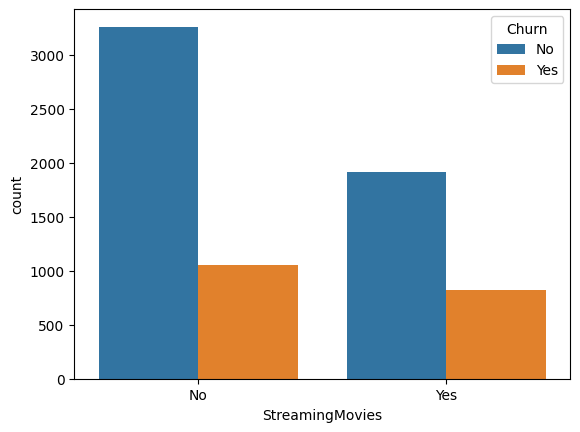

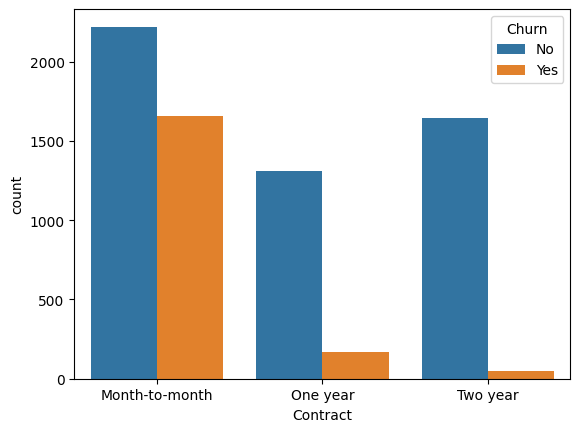

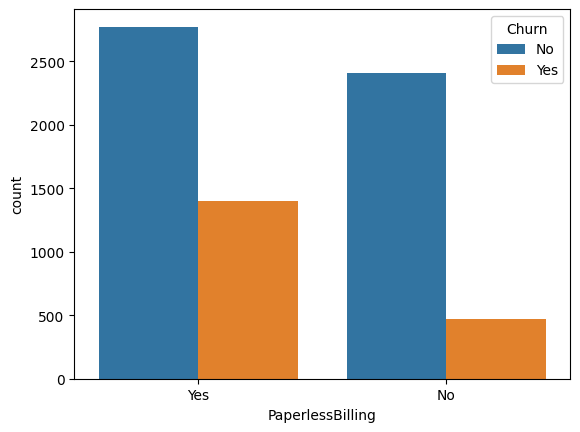

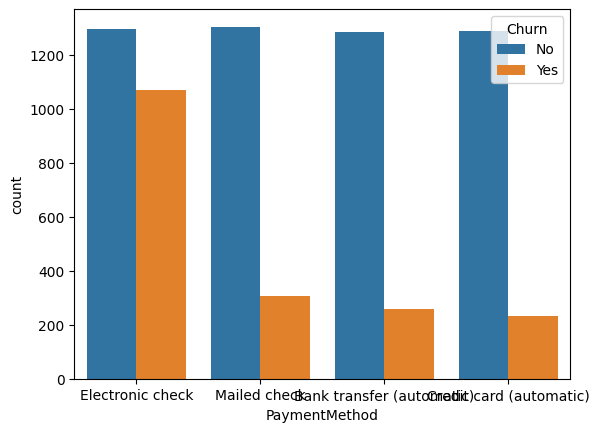

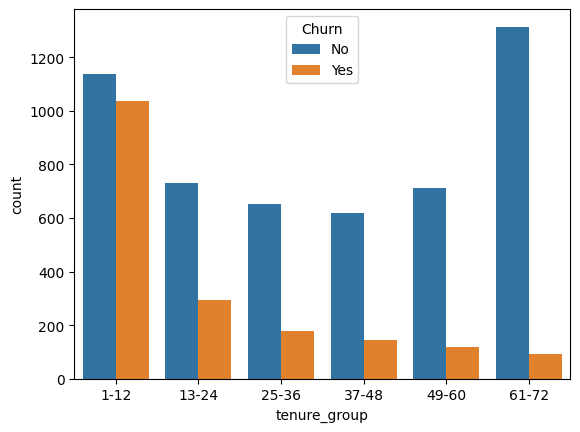

In [30]:
for i, predictor in enumerate(df.drop(columns =['Churn', 'MonthlyCharges', 'TotalCharges'])):
  plt.figure(i)
  sns.countplot(data=df,x=predictor, hue='Churn')

In [31]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [33]:
df['MonthlyCharges'].nunique() #SeniorCitizen	tenure	MonthlyCharges

1585

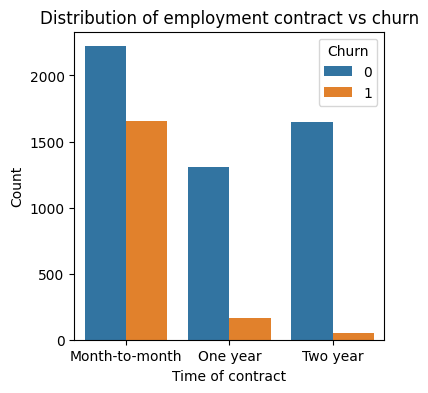

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xlabel('Time of contract')

# plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of employment contract vs churn')
plt.show()

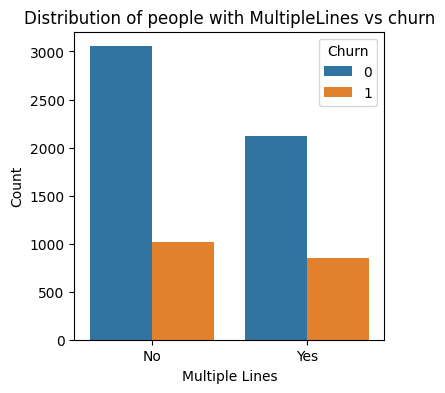

In [35]:
plt.figure(figsize=(4,4))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.xlabel('Multiple Lines')
# plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of people with MultipleLines vs churn')
plt.show()

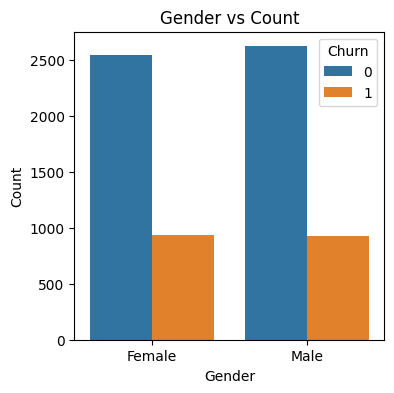

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', hue='Churn', data = df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Count')
plt.show()

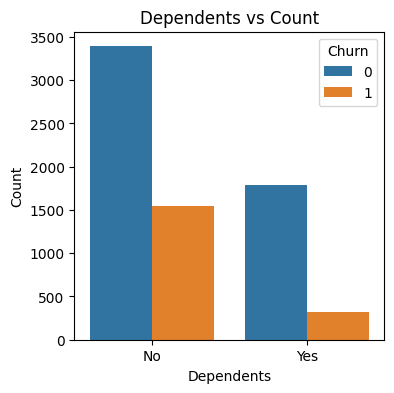

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x='Dependents', hue='Churn', data = df)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents vs Count')
plt.show()

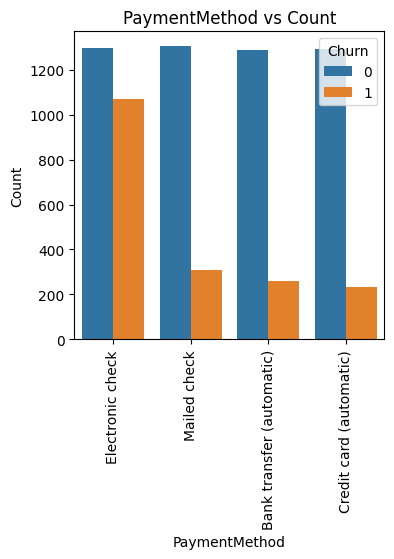

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(x='PaymentMethod', hue='Churn', data = df)
plt.xticks(rotation=90)
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('PaymentMethod vs Count')
plt.show()

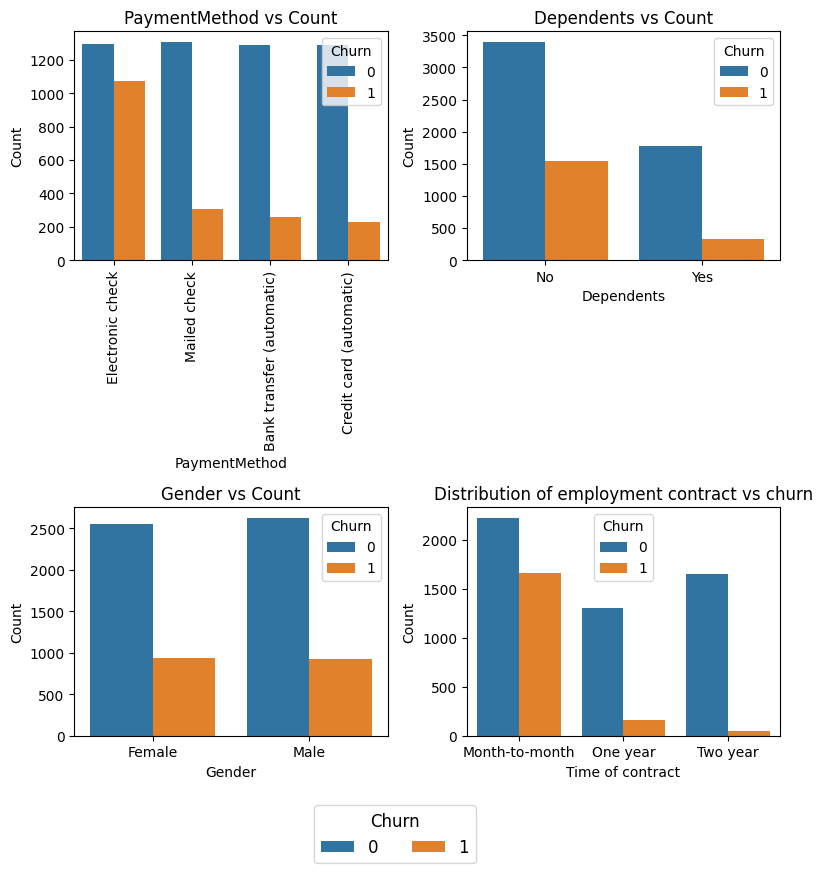

In [39]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Figure 1
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 0].set_xlabel('PaymentMethod')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('PaymentMethod vs Count')

# Figure 2
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Dependents')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Dependents vs Count')

# Figure 3
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Gender vs Count')

# Figure 4
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Time of contract')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of employment contract vs churn')

# Create the legend and increase its size
handles, labels = axes[1, 1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize='large')
legend.set_title('Churn')
plt.setp(legend.get_title(), fontsize='large')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [40]:
#sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [41]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [42]:
df.shape

(7043, 20)

In [43]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

In [44]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


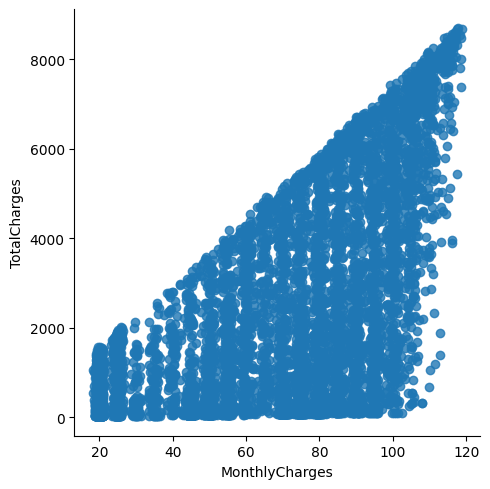

In [45]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly Charges by Churn')

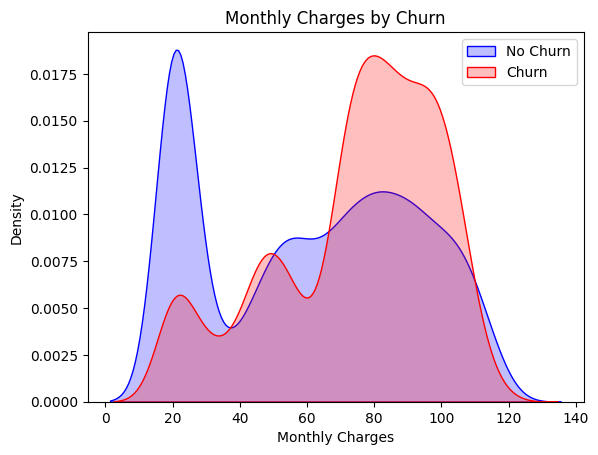

In [46]:
Mth = sns.kdeplot(df.MonthlyCharges[(df['Churn']== 0)], color='Blue', fill= True)
Mth = sns.kdeplot(df.MonthlyCharges[(df['Churn']== 1)], ax=Mth, color='Red', fill= True )

Mth.legend(['No Churn', 'Churn'], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

Text(0.5, 1.0, 'Total Charges by Churn')

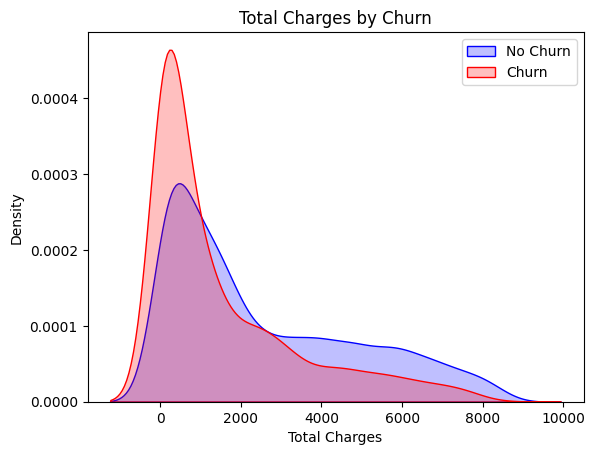

In [47]:
Mth = sns.kdeplot(df.TotalCharges[(df['Churn']== 0)], color='Blue', fill= True)
Mth = sns.kdeplot(df.TotalCharges[(df['Churn']== 1)], ax=Mth, color='Red', fill= True )

Mth.legend(['No Churn', 'Churn'], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by Churn')

<Axes: >

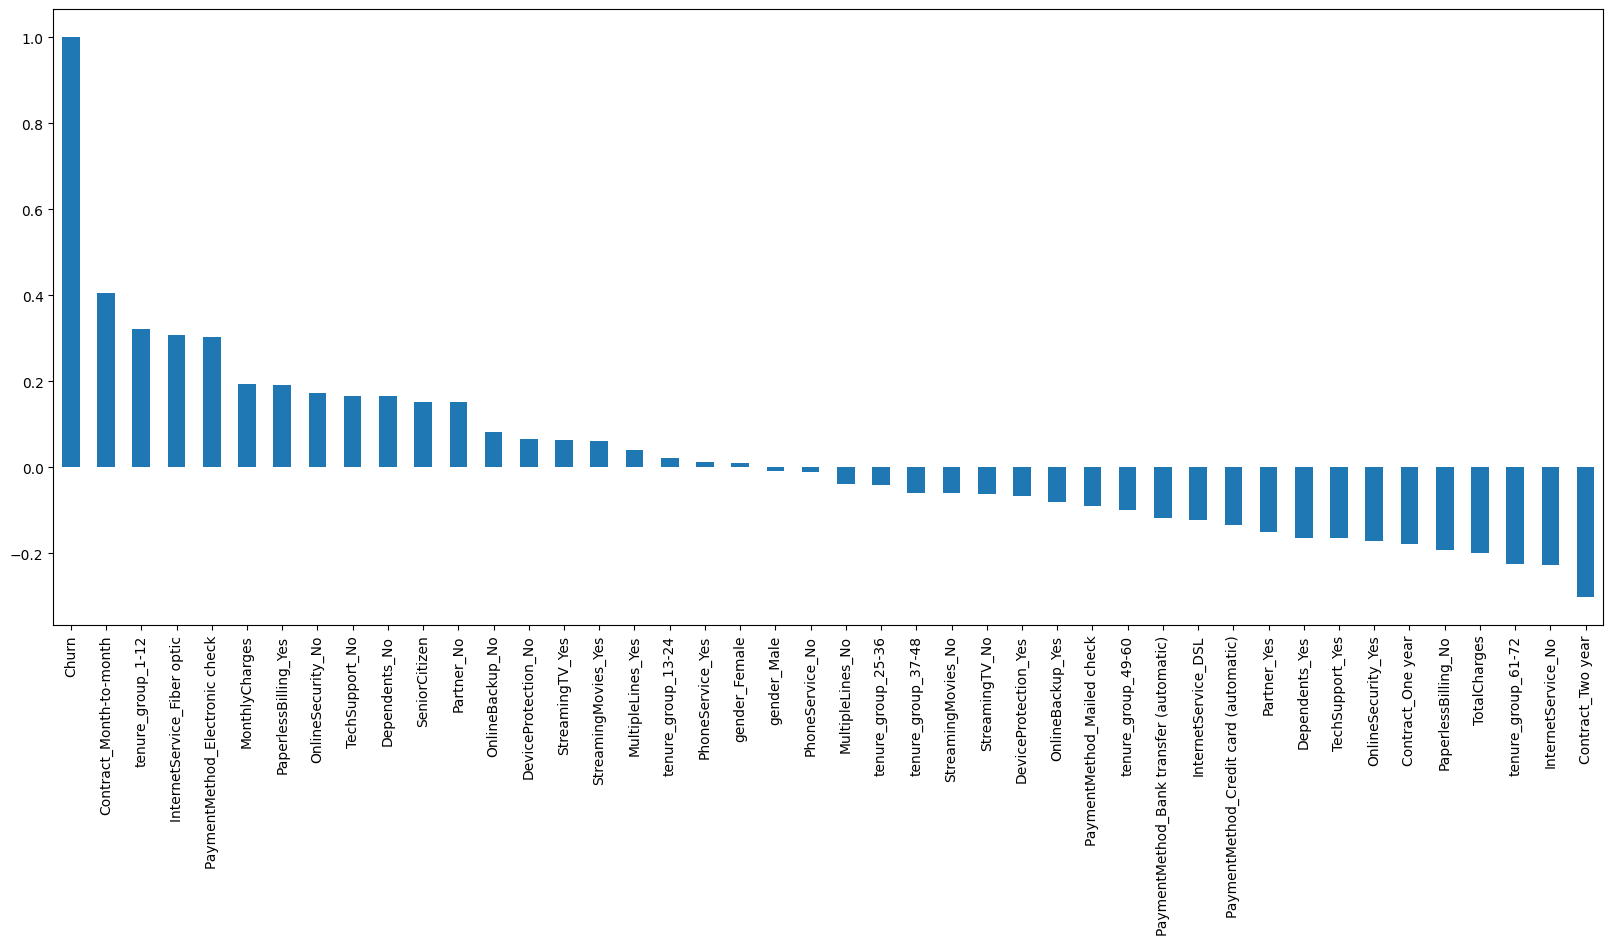

In [48]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
#This works for numerical columns only

# Bivariate Analysis

In [49]:
uniplot(churners, col='Partner', title = 'Distribution of Gender for churners', hue='gender')

NameError: ignored

In [ ]:
uniplot(non_churners, col='Partner', title = 'Distribution of Gender for non_churners', hue='gender')

In [ ]:
uniplot(churners, col='Contract', title = 'Distribution of Contract terms for churners', hue='gender')

In [ ]:
uniplot(non_churners, col='Contract', title = 'Distribution of Contract for non_churners', hue='gender')

In [ ]:
uniplot(churners, col='PaymentMethod', title = 'Distribution of Payment Method for churners', hue='gender')

In [ ]:
uniplot(churners, col='TechSupport', title = 'Distribution of TechSupport for churners', hue='gender')

In [ ]:
uniplot(churners, col='SeniorCitizen', title = 'Distribution of Senior Citizen for churners', hue='gender')

In [ ]:
fig = px.scatter(
    data_frame=data,
    x = "MonthlyCharges",
    y= "TotalCharges",
    title = "Relationship between Monthly Charges VS Total Charges",
    color = "MonthlyCharges",
    height=500
)
fig.show()

In [ ]:
df.head()

# Bivariate Analysis 2

In [96]:
def uniplot(dfs,col, title, hue='None'):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize'] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp=pd.Series(data=hue)
  #fig, ax = plt.subplots()
  #width = len(df[col].unique()) + 7 + 4*len(temp.unique())
  #fig.set_size_inches(width,8)
  fig, ax = plt.subplots(figsize=(6, 4))
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data = dfs, x = col, order = dfs[col].value_counts().index, hue=hue, palette='bright')

  plt.show


In [97]:
non_churners = df.loc[df['Churn']==0]
churners = df.loc[df['Churn']==1]

### Charts

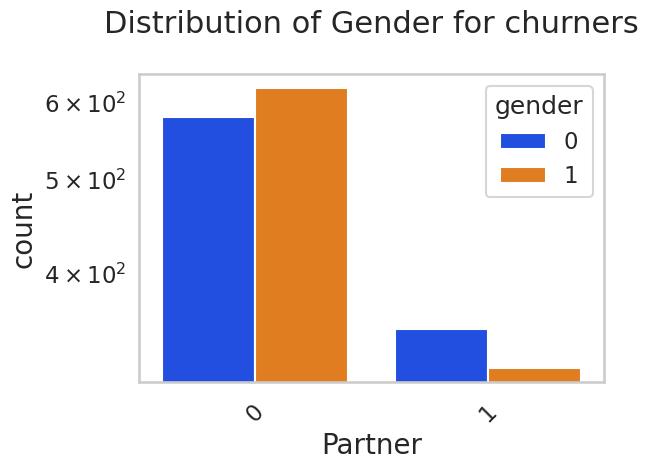

In [98]:
uniplot(churners, col='Partner', title = 'Distribution of Gender for churners', hue='gender')

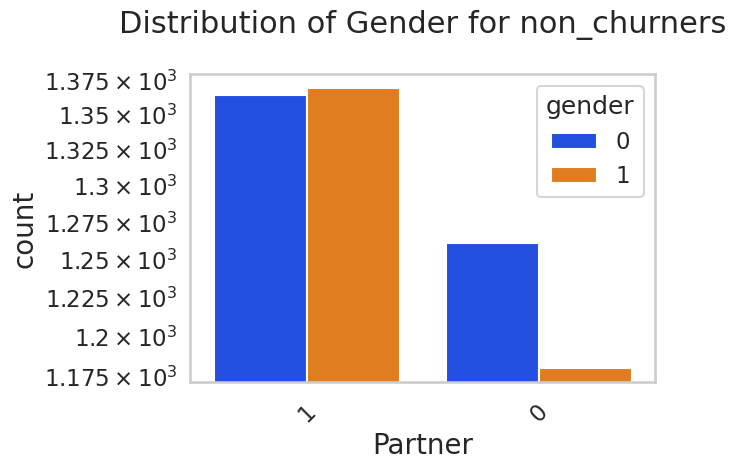

In [99]:
uniplot(non_churners, col='Partner', title = 'Distribution of Gender for non_churners', hue='gender')

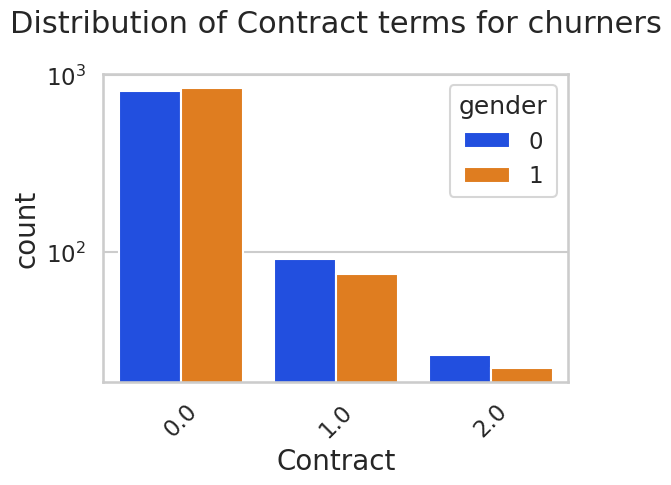

In [100]:
uniplot(churners, col='Contract', title = 'Distribution of Contract terms for churners', hue='gender')

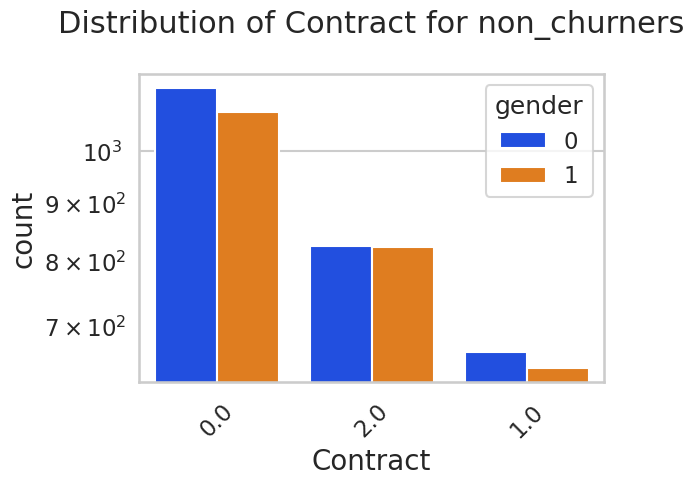

In [101]:
uniplot(non_churners, col='Contract', title = 'Distribution of Contract for non_churners', hue='gender')

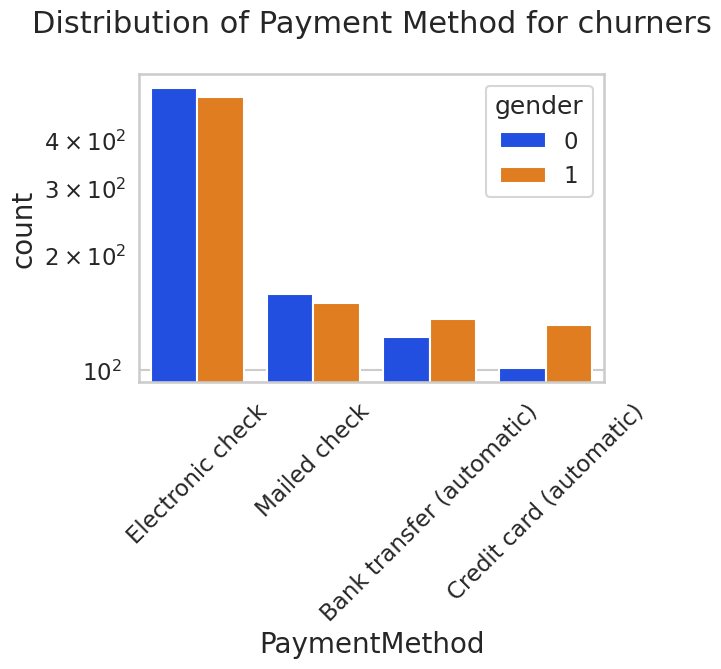

In [102]:
uniplot(churners, col='PaymentMethod', title = 'Distribution of Payment Method for churners', hue='gender')

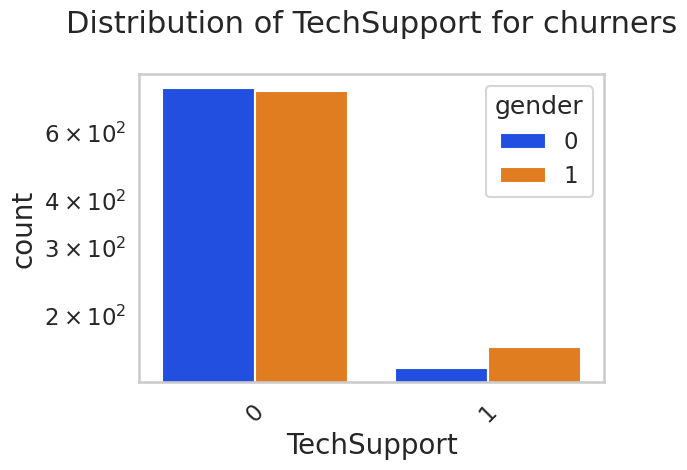

In [103]:
uniplot(churners, col='TechSupport', title = 'Distribution of TechSupport for churners', hue='gender')

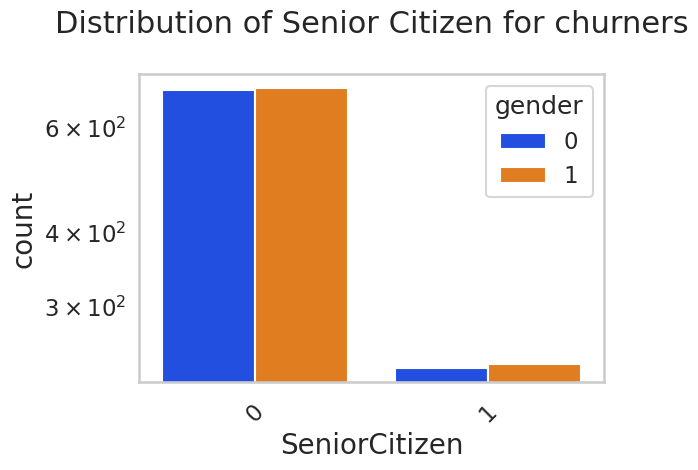

In [104]:
uniplot(churners, col='SeniorCitizen', title = 'Distribution of Senior Citizen for churners', hue='gender')

### Other charts

In [105]:
fig = px.scatter(data_frame = df, x='OnlineSecurity', y='OnlineBackup',
                 title = 'Relationship between streaming TV and Movies',
                 height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

In [106]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,0,0,DSL,0,1,0,0,0,0,0.0,1,Electronic check,0.115423,0.001275,0,0.0
1,0,0,0,0,1,0,DSL,1,0,1,0,0,0,1.0,0,Mailed check,0.385075,0.215867,0,2.0
2,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0.0,1,Mailed check,0.354229,0.010310,1,0.0
3,0,0,0,0,0,0,DSL,1,0,1,1,0,0,1.0,0,Bank transfer (automatic),0.239303,0.210241,0,3.0
4,1,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0.0,1,Electronic check,0.521891,0.015330,1,0.0


# Encoding

In [107]:
for column in df:
  print(f'{column}: {df[column].unique()}')

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','PaperlessBilling']

for col in yes_no_columns:
  df[col].replace({'Yes':1, 'No':0}, inplace = True)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: [0. 1. 2.]
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges: [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
Churn: [0 1]
tenure_group: [ 0.  2.  3.  1.  5.  4. nan]


In [108]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: [0. 1. 2.]
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges: [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
Churn: [0 1]
tenure_group: [ 0.  2.  3.  1.  5.  4. nan]


In [109]:
df['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [110]:
print(df['InternetService'].unique())
print(df['PaymentMethod'].unique())

['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [111]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,0,0,DSL,0,1,0,0,0,0,0.0,1,Electronic check,0.115423,0.001275,0,0.0
1,0,0,0,0,1,0,DSL,1,0,1,0,0,0,1.0,0,Mailed check,0.385075,0.215867,0,2.0
2,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0.0,1,Mailed check,0.354229,0.010310,1,0.0
3,0,0,0,0,0,0,DSL,1,0,1,1,0,0,1.0,0,Bank transfer (automatic),0.239303,0.210241,0,3.0
4,1,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0.0,1,Electronic check,0.521891,0.015330,1,0.0


In [112]:
one_zero_df = df.drop(['InternetService', 'Contract', 'PaymentMethod', 'tenure_group','MonthlyCharges','TotalCharges'], axis=1)

In [113]:
one_zero_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,1


In [114]:
dfs_dummies = pd.get_dummies(df[['InternetService', 'PaymentMethod']])

In [115]:
dfs_dummies.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0
4,0,1,0,0,0,1,0


In [116]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame
columns_to_encode = ['Contract', 'tenure_group']

# Extract the specified columns and convert to a 2D array
data_to_encode = df[columns_to_encode].values

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(data_to_encode)

# Replace the original columns with the encoded values in the DataFrame
df[columns_to_encode] = encoded_data

df[columns_to_encode].head()

,Contract,tenure_group
0,0.0,0.0
1,1.0,2.0
2,0.0,0.0
3,1.0,3.0
4,0.0,0.0


In [117]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df[columns_to_scale].head()

encoded_df = pd.concat([one_zero_df, dfs_dummies, df[columns_to_encode], df[columns_to_scale]], axis=1)

encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,tenure_group,MonthlyCharges,TotalCharges
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.0,0.115423,0.001275
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,2.0,0.385075,0.215867
2,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0.0,0.0,0.354229,0.010310
3,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1.0,3.0,0.239303,0.210241
4,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0.0,0.0,0.521891,0.015330


In [118]:
encoded_df.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
Contract                          

In [119]:
encoded_df.dropna(inplace = True)

# Segmentation


**Segmentation**, is the process of dividing a broad target audience into smaller, more defined groups based on certain characteristics. The goal is to create clusters that share similar traits.
1.	Understanding Diverse Audiences: Instead of treating the entire audience as a homogenous group, it allows for the identification of distinct subgroups with specific characteristics.
2.	Targeted Marketing: This enables more personalized and targeted marketing efforts, as the messages can be crafted to resonate with the specific needs and preferences of each segment.
3.	Enhanced Customer Satisfaction: Tailoring products, services, or marketing messages to the specific needs of a segment can lead to higher customer satisfaction. Customers are more likely to respond positively when they feel that a brand understands and caters to their unique requirements.
4.	Market Expansion: Segmentation can also help identify new, untapped markets.
5.	Product Development: Businesses can create products that cater to the distinct requirements of each segment, potentially leading to higher sales and customer loyalty.
Through segmentation, it is possible to identify the different characteristics of customers as well.

In [120]:
encodeds_df = encoded_df.drop('Churn', axis=1)
encods = encoded_df['Churn']

In [121]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(encodeds_df)#replace with df_scaled
    errors.append(model.inertia_)

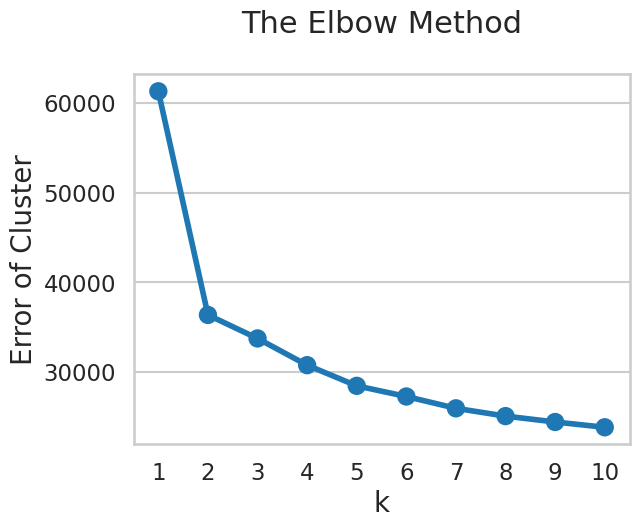

In [122]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

In [123]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(encodeds_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [124]:
data = encodeds_df.assign(ClusterLabel = model.labels_)#df_scaled

In [125]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,tenure_group,MonthlyCharges,TotalCharges,ClusterLabel
0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0.0,0.0,0.115423,0.001275,1
1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.0,2.0,0.385075,0.215867,0
2,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0.0,0.0,0.354229,0.010310,1
3,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1.0,3.0,0.239303,0.210241,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.0,0.0,0.521891,0.015330,1


In [126]:
data.groupby("ClusterLabel")[["MonthlyCharges", "TotalCharges"]].median()

,MonthlyCharges,TotalCharges
ClusterLabel,,
0,0.558706,0.289136
1,0.416169,0.036161
2,0.632338,0.586609


In [127]:
data = encodeds_df.assign(ClusterLabel = model.labels_)#df_scaled

In [128]:
#data = df[["Churn", "TotalCharges", "MonthlyCharges"]]
# Add a small constant value to avoid zero
df_log = np.log(data + 1e-8)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [129]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(encodeds_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [130]:
datas = data.assign(ClusterLabel= model.labels_)
data.groupby("ClusterLabel")[["MonthlyCharges", "TotalCharges"]].median()
#result = datas.groupby("ClusterLabel").agg({"tenure_group":"median", "TotalCharges":"median", "MonthlyCharges":"median"}).round()

,MonthlyCharges,TotalCharges
ClusterLabel,,
0,0.558706,0.289136
1,0.416169,0.036161
2,0.632338,0.586609


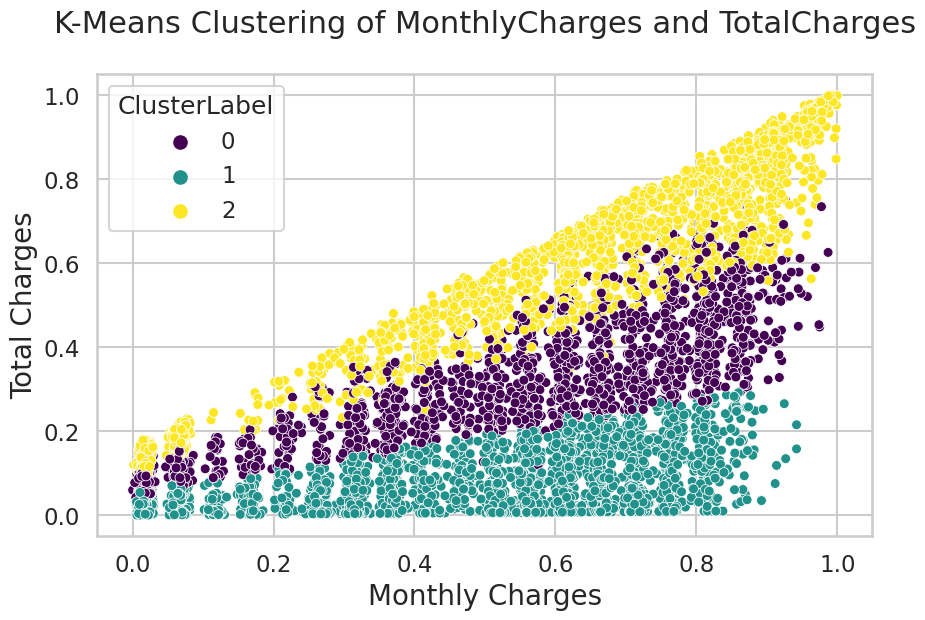

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='ClusterLabel', palette='viridis', s=50)
plt.title('K-Means Clustering of MonthlyCharges and TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# Splitting

In [132]:
encoded_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

In [133]:
encoded_df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract                                   0
tenure_gro

In [134]:
encoded_df.dropna(subset=['tenure_group', 'TotalCharges'], inplace=True)

In [135]:
X = encoded_df.drop('Churn', axis = 1)
y = encoded_df['Churn']

In [136]:
X.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract                                   0
tenure_group                               0
MonthlyCha

In [137]:
# Assuming df is your DataFrame
X.dropna(subset=['tenure_group', 'TotalCharges'], inplace=True)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [139]:
X_train.shape

(5625, 24)

In [140]:
len(X_train.columns)

24

In [141]:
y.shape

(7032,)

In [142]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Balance

In [143]:
# len(y_test.columns)

In [144]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [145]:
churn_counts = df['Churn'].value_counts()

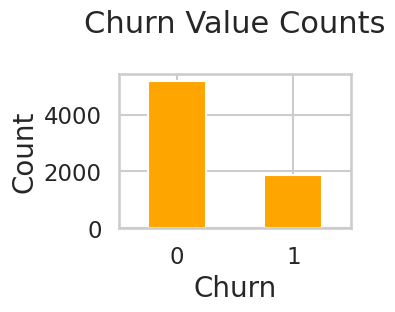

In [146]:
plt.figure(figsize=(3, 2))
churn_counts.plot(kind='bar', color='orange')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Value Counts')
plt.xticks(rotation=0)
plt.show()

From the diagram above, there is data imbalance in Churn column. Therefore, SMOTE technique will be used to balance it.

In [147]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5625, 24) (1407, 24) (5625,) (1407,)


In [148]:
y.isnull().sum()

0

In [149]:
y.dropna(inplace = True, axis = 0)

In [150]:
y.isnull().sum()

0

## smote

The purpose of SMOTE is to balance the class distribution by generating synthetic examples of the minority class. It works by creating synthetic samples that are similar to existing instances of the minority class, thus providing more information to the model and reducing the bias.

In [151]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [152]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [154]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

# Modelling

In [162]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        layers.Dense(24, input_shape=(24,), activation='relu'),
        layers.Dense(48, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        history = model.fit(X_train, y_train, epochs=100)
    else:
        history = model.fit(X_train, y_train, epochs=100, class_weight=weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return model, y_preds, history

In [163]:
y_test.head(10)

3045     1
4723     0
10271    1
9289     1
5026     0
3950     0
1036     1
2993     0
9954     1
1079     1
Name: Churn, dtype: int64

In [164]:
y_preds = model.predict(X_test)

In [165]:
y_preds

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

## Model prediction

In [166]:
# Assuming predicted_probabilities is already defined
predicted_probabilities = y_preds
# Display predictions
threshold = 0.5
max_display_churn = 7
max_display_non_churn = 7
output1 = ""
output2 = ""

for i, probability in enumerate(predicted_probabilities):
    churn_prediction = 1 if probability > threshold else 0

    if churn_prediction == 1 and max_display_churn > 0:
        output1 += "Customer {} is likely to be churned.\n".format(i)
        max_display_churn -= 1  # Decrease the count of churn predictions to display

    elif churn_prediction == 0 and max_display_non_churn > 0:
        output2 += "Customer {} is not likely to be churned.\n".format(i)
        max_display_non_churn -= 1  # Decrease the count of non-churn predictions to display

    if max_display_churn == 0 and max_display_non_churn == 0:
        break  # Exit the loop after displaying the desired number of predictions

print( output1)
print( output2)


Customer 0 is likely to be churned.
Customer 1 is likely to be churned.
Customer 2 is likely to be churned.
Customer 3 is likely to be churned.
Customer 5 is likely to be churned.
Customer 7 is likely to be churned.
Customer 8 is likely to be churned.

Customer 4 is not likely to be churned.
Customer 6 is not likely to be churned.
Customer 15 is not likely to be churned.
Customer 23 is not likely to be churned.
Customer 32 is not likely to be churned.
Customer 38 is not likely to be churned.
Customer 41 is not likely to be churned.



In [167]:
model, y_preds, history = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5164 - accuracy: 0.7439
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7809
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7838
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7886
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7909
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7954
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7966
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8004
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4257 - accura

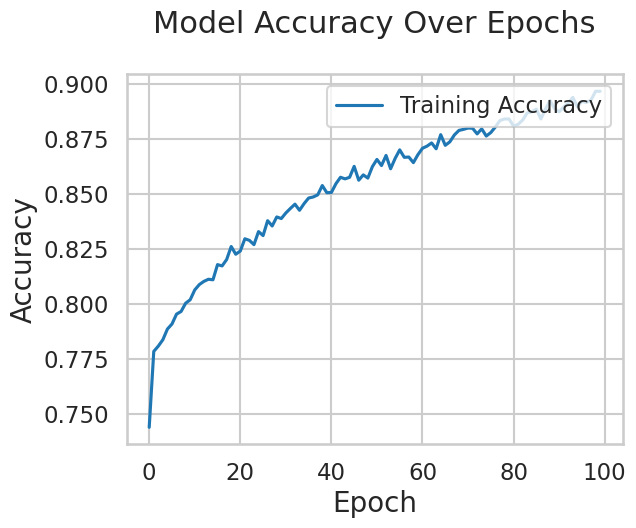

In [168]:
# Plotting training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper right')
plt.show()

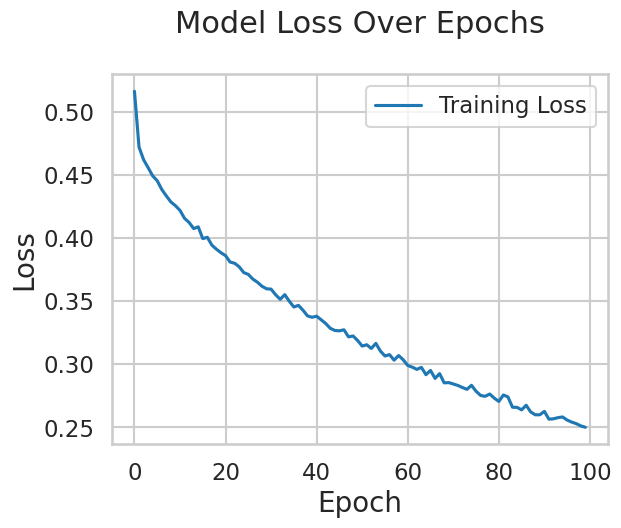

In [169]:
# Plotting training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

**For churners.**

**Retention Offers:**
Provide personalized offers, discounts, or incentives to encourage churners to stay with your service or product.Offer loyalty programs to reward long-term customers.

**Customer support**
Enhance customer support to address issues promptly and improve overall customer satisfaction.
Increase communication and engagement with churners through targeted marketing campaigns.

**Reactivation Campaigns:**
Design reactivation campaigns to win back customers by offering special promotions or new features.Highlight improvements or updates to your product or service.

**Subscription Flexibility:**
Provide flexible subscription plans, allowing customers to adjust their plans based on their needs.Offer trial extensions or pause options to accommodate temporary changes.

**For non-churners.**

**Upselling and Cross-Selling:**
Identify opportunities for upselling or cross-selling additional products or services to non-churners.Offer premium features or complementary products.

**Customer Loyalty Programs:**
Reward loyal customers with exclusive benefits, discounts, or early access to new features.Encourage non-churners to refer friends or colleagues.

**Continuous Improvement:**
Regularly update and improve your products or services to maintain customer satisfaction. Stay informed about industry trends and customer preferences.

**Customer Education:**
Provide educational content to help non-churners maximize the value of your product or service. Offer training sessions or webinars for advanced features.

**Proactive Communication:**
Keep non-churners informed about upcoming changes, updates, or improvements.
Solicit feedback to ensure continuous alignment with customer needs.